# Project 3: Poisonous Mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 examples, where each describes a mushroom by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. The feature space has been binarized. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using k-means and density estimation with Gaussian mixture models (GMM). Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please **prepare your own write-up and write your own code**.

In [2]:
%matplotlib inline

import urllib.request as urllib2 # For python3
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm
from sklearn.preprocessing import StandardScaler

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [3]:
MUSHROOM_DATA = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.data'
MUSHROOM_MAP = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.map'

Load feature names.

In [4]:
feature_names = []

for line in urllib2.urlopen(MUSHROOM_MAP):
    [index, name, junk] = line.decode('utf-8').split()
    feature_names.append(name)

print('Loaded feature names: ', len(feature_names))
print(feature_names)

Loaded feature names:  126
['cap-shape=bell', 'cap-shape=conical', 'cap-shape=convex', 'cap-shape=flat', 'cap-shape=knobbed', 'cap-shape=sunken', 'cap-surface=fibrous', 'cap-surface=grooves', 'cap-surface=scaly', 'cap-surface=smooth', 'cap-color=brown', 'cap-color=buff', 'cap-color=cinnamon', 'cap-color=gray', 'cap-color=green', 'cap-color=pink', 'cap-color=purple', 'cap-color=red', 'cap-color=white', 'cap-color=yellow', 'bruises?=bruises', 'bruises?=no', 'odor=almond', 'odor=anise', 'odor=creosote', 'odor=fishy', 'odor=foul', 'odor=musty', 'odor=none', 'odor=pungent', 'odor=spicy', 'gill-attachment=attached', 'gill-attachment=descending', 'gill-attachment=free', 'gill-attachment=notched', 'gill-spacing=close', 'gill-spacing=crowded', 'gill-spacing=distant', 'gill-size=broad', 'gill-size=narrow', 'gill-color=black', 'gill-color=brown', 'gill-color=buff', 'gill-color=chocolate', 'gill-color=gray', 'gill-color=green', 'gill-color=orange', 'gill-color=pink', 'gill-color=purple', 'gill-col

Load data. The dataset is sparse, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [5]:
X, Y = [], []

for line in urllib2.urlopen(MUSHROOM_DATA):
    items = line.decode('utf-8').split()
    Y.append(int(items.pop(0)))
    x = np.zeros(len(feature_names))
    for item in items:
        feature = int(str(item).split(':')[0])
        x[feature] = 1
    X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


In [6]:
print(train_data)

[[0. 0. 1. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]]


### Part 1:

Do a principal components analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50].  Also show a lineplot of fraction of total variance vs. number of principal components, for all possible numbers of principal components.

Notes:
* You can use `PCA` to produce a PCA analysis.

First 1 components explain 8.86% of total variance
First 2 components explain 16.78% of total variance
First 3 components explain 23.91% of total variance
First 4 components explain 29.86% of total variance
First 5 components explain 35.13% of total variance
First 10 components explain 51.13% of total variance
First 20 components explain 65.6% of total variance
First 30 components explain 75.08% of total variance
First 40 components explain 83.43% of total variance
First 50 components explain 90.41% of total variance

 Fraction of total vaiance vs. number of principal components 
 Max K = 126


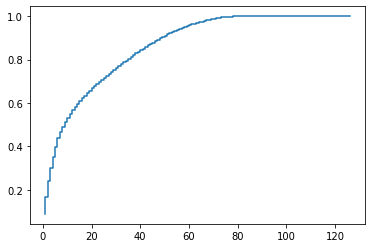

In [5]:
def P1():

    ### STUDENT START ###
    # Scale data for PCA
    scaled_train = StandardScaler().fit_transform(train_data)
    
    # Set list of Ks and run PCA for each value of k, printing the explained variance
    k_list = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50]
    for k in k_list:
        pca = PCA(n_components=k)
        pca.fit(scaled_train)
        explained_var = np.sum(pca.explained_variance_ratio_)
        print("First {0} components explain {1}% of total variance".format(k, round(explained_var*100,2)))
    
    # max_k = the number of features
    max_k = len(feature_names)
    print("\n Fraction of total vaiance vs. number of principal components \n Max K = {0}".format(max_k))
    pca = PCA(n_components=max_k)
    pca.fit(scaled_train)
    k_vals = range(1,max_k+1)
    # Plot explained variance up to max k
    explained_var = np.cumsum(pca.explained_variance_ratio_)
    plt.step(k_vals, explained_var)
    plt.show

    ### STUDENT END ###

P1()

### Part 2:

PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and show as a square scatterplot. Show the positive (poisonous) examples in red and the negative (non-poisonous) examples in green. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

Notes:
* You can use `PCA` to produce a PCA analysis.

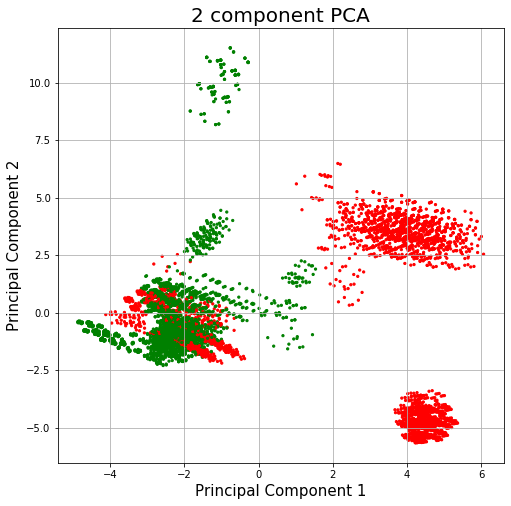

In [6]:
def P2():

    ### STUDENT START ###
    # Scale data for PCA
    scaled_train = StandardScaler().fit_transform(train_data)
    # Reduce dimensions to 2
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(scaled_train)
    x = [item[0] for item in principalComponents] 
    y = [item[1] for item in principalComponents] 

    # Plot 2 dimensional PCA with poisonous as color
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    # Set colors red for poisonous and g for non-poisonous
    colors = ['r' if label == 1 else 'g' for label in train_labels]
    ax.scatter(x, y, c = colors, s = 5)
    ax.grid()
    ### STUDENT END ###

P2()

### Part 3:

Fit a k-means cluster model with 6 clusters over the 2d projected data. As in part 2, show as a square scatterplot with the positive (poisonous) examples in red and the negative (non-poisonous) examples in green.  For each cluster, mark the centroid and plot a circle that goes through the cluster's example that is most distant from the centroid.

Notes:
* You can use `KMeans` to produce a k-means cluster analysis.
* You can use `linalg.norm` to determine distance (dissimilarity) between observations.

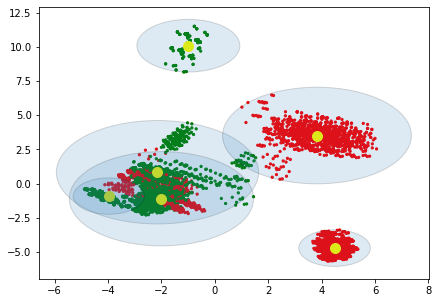

In [7]:
def P3():

    ### STUDENT START ###
    # Scale data for PCA
    scaled_train = StandardScaler().fit_transform(train_data)
    # Reduce dimensions to 2 using PCA
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(scaled_train)
    x = [item[0] for item in principalComponents] 
    y = [item[1] for item in principalComponents] 
    
    # Fit K means clustering to 2 dimensional PCA data
    estimator = KMeans(n_clusters=6)
    kmeans = estimator.fit(principalComponents)
    y_kmeans = kmeans.predict(principalComponents)
    clusters_centroids=dict()
    clusters_radii= dict()

    estimator.cluster_centers_
    
    # Determine max radii for clusters
    for cluster in range(6):
        clusters_centroids[cluster]=list(zip(estimator.cluster_centers_[:, 0],estimator.cluster_centers_[:,1]))[cluster]
        clusters_radii[cluster] = max([np.linalg.norm(np.subtract(i,clusters_centroids[cluster])) for i in zip(principalComponents[y_kmeans == cluster, 0],principalComponents[y_kmeans == cluster, 1])])

    colors = ['r' if label == 1 else 'g' for label in train_labels]
    fig, ax = plt.subplots(1,figsize=(7,5))
    
    # Plot scatterplot
    plt.scatter(x, y, s = 5, c = colors)
    
    # Plot cluster radii
    for i in range(6):
        art = mpatches.Circle(clusters_centroids[i],clusters_radii[i],fill='black', edgecolor='black',alpha=0.15)
        ax.add_patch(art)

    # Plot the centroids of the clusters
    plt.scatter(estimator.cluster_centers_[:, 0], estimator.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

    ### STUDENT END ###

P3()

### Part 4:

Fit Gaussian mixture models for the positive (poisonous) examples in your 2d projected data. Vary the number of mixture components from 1 to 4 and the covariance matrix type 'spherical', 'diag', 'tied', 'full' (that's 16 models).  Show square plots of the estimated density contours presented in a 4x4 grid - one row each for a number of mixture components and one column each for a convariance matrix type.  

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `contour` in combination with other methods to plot contours, like in this example: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py
* You can use `contour` without the `norm` and `levels` parameters. 

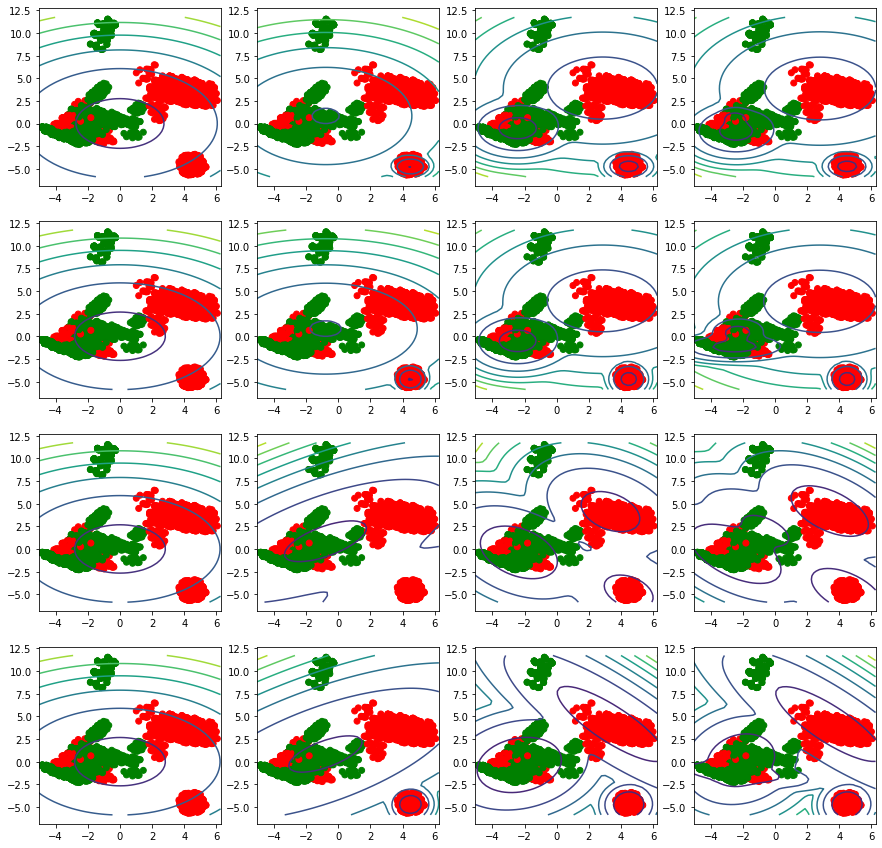

In [8]:
def P4():

    ### STUDENT START ###
    
    # Scale data for PCA and fit / transform 2 dimensional PCA
    scaled_train = StandardScaler().fit_transform(train_data)
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(scaled_train)
    
    # Set colors for charts
    colors = ['r' if label == 1 else 'g' for label in train_labels]

    covariance_types = ['spherical', 'diag', 'tied', 'full']
    fig, axs = plt.subplots(4,4)
    fig.set_figheight(15)
    fig.set_figwidth(15)
    
    # for each n components and type of covariance
    for n in range(1,5):
        for c in range(4):
            cov = covariance_types[c]
            
            # Train gaussian mixture estimator
            estimator = GaussianMixture(n_components=n, covariance_type=cov, random_state=12345)
            gmix = estimator.fit(principalComponents)
            pcx = [item[0] for item in principalComponents] 
            pcy = [item[1] for item in principalComponents]
            minx = np.min(pcx)-0.2
            miny = np.min(pcy)-0.2
            maxx = np.max(pcx)+0.2
            maxy = np.max(pcy)+0.2
            
            # Format data for contour plotting
            x = np.linspace(minx, maxx)
            y = np.linspace(miny, maxy)
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T
            Z = -gmix.score_samples(XX)
            Z = Z.reshape(X.shape)
            
            # plot contour results
            axs[c, n-1].contour(X, Y, Z)
            axs[c, n-1].scatter(pcx, pcy, c=colors)
    plt.show()

    ### STUDENT END ###

P4()

### Part 5:

Fit two Gaussian mixture models, one for the positive examples and one for the negative examples in your 2d projected data. Use 4 mixture components and full convariance for each model.  Predict the test example labels by picking the labels corresponding to the larger of the two models' probabilities.  What is the accuracy of you predictions on the test data?

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `GaussianMixture`'s `score_samples` method to find the probabilities.

In [9]:
def P5():

    ### STUDENT START ###
    
    # Scale training and test data using same scaler
    scaler = StandardScaler()
    scaled_train = scaler.fit_transform(train_data)
    scaled_test = scaler.transform(test_data)
    
    # Use 2 dimensional PCA on training and test data for positive and negative samples
    pca = PCA(n_components=2)
    pca_train = pca.fit_transform(scaled_train)
    pos_pca = pca_train[np.where(train_labels==1)]
    neg_pca = pca_train[np.where(train_labels==0)]

    pca_test = pca.transform(scaled_test)

    # Train GM estimator with 3 components and full cov type for both positive and negative samples
    estimator_pos = GaussianMixture(n_components=4, covariance_type='full', random_state=12345)
    gmix_pos = estimator_pos.fit(pos_pca)

    estimator_neg = GaussianMixture(n_components=4, covariance_type='full', random_state=12345)
    gmix_neg = estimator_neg.fit(neg_pca)
    
    # Determine negative and positive probabilities for test data
    neg_prob = estimator_neg.score_samples(pca_test)
    pos_prob = estimator_pos.score_samples(pca_test)

    neg_pos_list = [list(a) for a in zip(neg_prob, pos_prob)]

    pred_result = []
    
    # Determine whether positive or negative probability is greater
    for i in range(len(neg_pos_list)):
        list_i = neg_pos_list[i]
        max_ind = list_i.index(max(list_i))
        pred_result.append(max_ind)

    accurate_count = sum(a == b for a,b in zip(pred_result, test_labels))
    
    # Determine and print accuracy
    accuracy = accurate_count / len(test_labels)
    print("Accuracy  . . . .  {0}%".format(round(accuracy*100,2)))

    ### STUDENT END ###

P5()

Accuracy  . . . .  91.28%


### Part 6:

Run a series of experiments to find the Gaussian mixture model that results in the best accuracy with no more than 50 parameters.  Do this by varying the number of PCA components, the number of GMM components, and the covariance type.

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.


* For spherical, diag, and full covariance types:
  * number of parameters = (number of parameters per gmm component * number of gmm components - 1) * number of classes
  * number of parameters per gmm component includes all the means plus all the non-zero, non-duplicated values in the covariance matrix plus the mixing weight
  * Each mixing weight parameter indicates how much to weight a particular gmm component; the -1 above accounts for the fact that the mixing weights must sum to 1, so you do not need to include the last mixing weight as its own parameter


* To calculate the number of parameters for tied covariance type:
  * number of parameters = (number of parameters per class - 1) * number of classes
  * number of parameters per class includes all the means and mixing weights for all the gmm components plus all the non-zero, non-duplicated values in the one shared covariance matrix
  * Each mixing weight parameter indicates how much to weight a particular gmm component; the -1 above accounts for the fact that the mixing weights must sum to 1, so you do not need to include the last mixing weight as its own parameter

In [10]:
def P6():

    ### STUDENT START ###
    
    # Set variables for later use
    k_vals = []
    n_vals = []
    cov_types = []
    accuracies = []
    num_parameters = []
    models_run = 0
    covariance_types = ['spherical', 'diag', 'tied', 'full']
    
    # Scale data for PCA
    scaler = StandardScaler()
    scaled_train = scaler.fit_transform(train_data)
    scaled_test = scaler.transform(test_data)

    # Test k from 1 to 10
    for k in range (1,11):
        # Test n components from 1 to 10
        for n in range(1,11):
            # Test all cov types
            for c in range(0,4):
                
                # Fit / transform PCA with k components
                pca = PCA(n_components=k)
                pca_train = pca.fit_transform(scaled_train)
                pos_pca = pca_train[np.where(train_labels==1)]
                neg_pca = pca_train[np.where(train_labels==0)]
                pca_test = pca.transform(scaled_test)
                
                # Fit GM estimator with cov type as set by loop for both positive and negative samples
                cov = covariance_types[c]
                estimator_pos = GaussianMixture(n_components=n, covariance_type=cov, random_state=12345)
                gmix_pos = estimator_pos.fit(pos_pca)

                estimator_neg = GaussianMixture(n_components=n, covariance_type=cov, random_state=12345)
                gmix_neg = estimator_neg.fit(neg_pca)
                models_run += 1
                
                # Calculate number of parameters
                num_means = gmix_pos.means_.size
                num_weights = len(gmix_pos.weights_)
                num_uniq_cov = len(np.flatnonzero(np.unique(gmix_pos.covariances_)))
                num_classes = 2   # poisonous / non-poisonous
                if cov == 'tied':
                    num_params = ( num_means + num_uniq_cov + num_weights - 1) * num_classes
                else:
                    num_params = ( num_means + num_uniq_cov + num_weights - 1) * k * num_classes
                # If the number of parameters < 50 then log results
                if num_params > 50:
                    continue
                else:
                    neg_prob = estimator_neg.score_samples(pca_test)
                    pos_prob = estimator_pos.score_samples(pca_test)
                    neg_pos_list = [list(a) for a in zip(neg_prob, pos_prob)]

                    pred_result = []
                    for i in range(len(neg_pos_list)):
                        list_i = neg_pos_list[i]
                        max_ind = list_i.index(max(list_i))
                        pred_result.append(max_ind)

                    accurate_count = sum(a == b for a,b in zip(pred_result, test_labels))
                    accuracy = accurate_count / len(test_labels)
                    accuracies.append(accuracy)
                    num_parameters.append(num_params)
                    k_vals.append(k)
                    n_vals.append(n)
                    cov_types.append(cov)
                    
    # Determine most accurate model pair and print results
    max_accuracy = max(accuracies)
    max_ind = accuracies.index(max(accuracies))
    params = num_parameters[max_ind]
    pca_val = k_vals[max_ind]
    gmm = n_vals[max_ind]
    cov_type = cov_types[max_ind]
    print("Number of models run  . . . .  {0}".format(models_run))
    print("Max Accuracy  . . . .  {0}%".format(round(100*max_accuracy,2)))
    print("Number of Parameters  . . . .  {0}".format(params))
    print("PCA Components  . . . .  {0}".format(pca_val))
    print("GMM Components  . . . .  {0}".format(gmm))
    print("Covariance Type  . . . .  {0}".format(cov_type))


    ### STUDENT END ###

P6()

Number of models run  . . . .  400
Max Accuracy  . . . .  93.86%
Number of Parameters  . . . .  38
PCA Components  . . . .  4
GMM Components  . . . .  2
Covariance Type  . . . .  tied
